In [ ]:
import os
import random
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPool2D,
    Dropout,
    Flatten,
    Dense,
    Concatenate,
    Average,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import  MobileNet
from tensorflow.keras.utils import plot_model
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_dir= '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/data'

In [ ]:
class_labels = ['desert', 'water', 'cloudy', 'green_area']

In [ ]:
import pandas as pd
import os

# Initialize empty lists for image paths and labels
img_list = []
label_list = []

# Iterate over each class label
for label in class_labels:
    class_dir = os.path.join(data_dir, label)

    # Iterate over image files within the class directory
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img_list.append(img_path)
        label_list.append(label)

# Create a DataFrame with image paths and labels
df = pd.DataFrame({'img': img_list, 'label': label_list})

In [ ]:
class_counts = df['label'].value_counts()
print(class_counts)

water         1500
cloudy        1500
green_area    1500
desert        1131
Name: label, dtype: int64


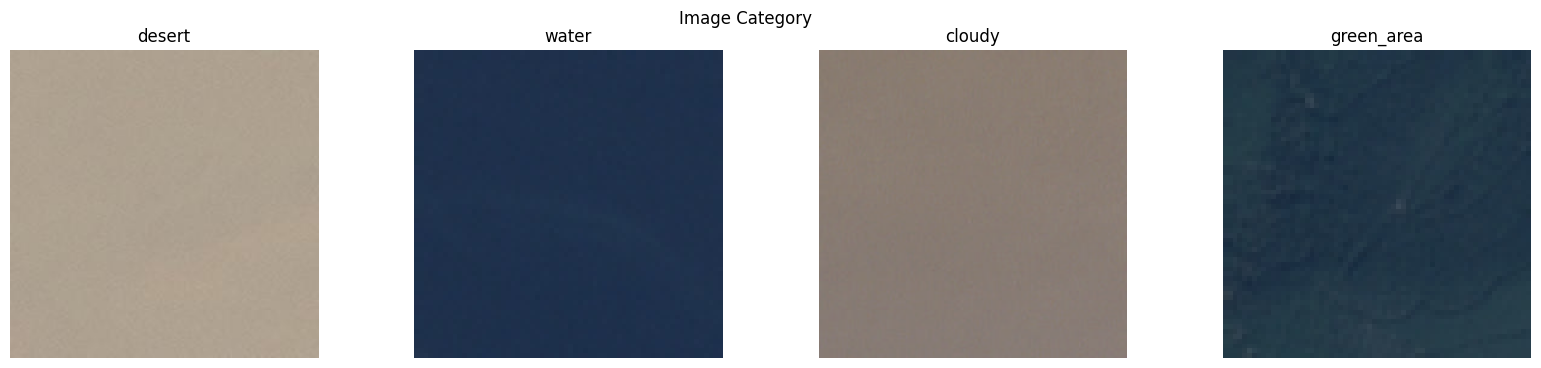

In [ ]:
# Define the number of sample images to display
num_samples = 12

# Create a figure with subplots for each category
fig, ax = plt.subplots(ncols=len(class_labels), figsize=(20, 4))
fig.suptitle('Image Category')

# Randomly select an image from each category and display it
for i, label in enumerate(class_labels):
    ax[i].set_title(label)
    sample_images = df[df['label'] == label]['img'].sample(num_samples).tolist()
    for j, image_path in enumerate(sample_images):
        ax[i].imshow(plt.imread(image_path))
        ax[i].axis('off')

plt.show()

In [ ]:
image_shape = plt.imread(df['img'][0]).shape
print(image_shape)

(256, 256, 3)


In [ ]:
#############################################################################################

In [ ]:
# TRAIN, VAL AND TEST SETS

In [ ]:
pip install split-folders

In [ ]:
import splitfolders


In [ ]:
import splitfolders

# Define the source directory containing your dataset
data_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/data'

# Define the output directory where the split dataset will be stored
output_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split'

# Split the dataset into train, validation, and test sets (60% train, 20% validation, 20% test)
splitfolders.ratio(
    data_dir,  # Correctly set source_dir to the path of your dataset directory
    output=output_dir,
    seed=42,  # Optional random seed for reproducibility
    ratio=(0.6, 0.2, 0.2),  # 60% train, 20% validation, 20% test
)




Copying files: 0 files [00:00, ? files/s]

Copying files: 1 files [00:00,  3.35 files/s]

Copying files: 12 files [00:00, 33.95 files/s]

Copying files: 17 files [00:01, 12.76 files/s]

Copying files: 28 files [00:01, 24.08 files/s]

Copying files: 40 files [00:01, 37.78 files/s]

Copying files: 49 files [00:01, 46.46 files/s]

Copying files: 58 files [00:01, 54.80 files/s]

Copying files: 67 files [00:01, 60.11 files/s]

Copying files: 76 files [00:01, 64.92 files/s]

Copying files: 87 files [00:02, 73.21 files/s]

Copying files: 98 files [00:02, 82.12 files/s]

Copying files: 108 files [00:02, 83.37 files/s]

Copying files: 118 files [00:02, 86.33 files/s]

Copying files: 130 files [00:02, 94.00 files/s]

Copying files: 140 files [00:02, 92.00 files/s]

Copying files: 150 files [00:02, 91.66 files/s]

Copying files: 162 files [00:02, 92.74 files/s]

Copying files: 174 files [00:02, 97.58 files/s]

Copying files: 184 files [00:02, 95.71 files/s]

Copying files: 194 files [00:03, 92.

In [ ]:
import os

# Define the base directory containing your dataset
base_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split'

# List of dataset splits (e.g., 'train_dataset', 'validation_dataset', 'test_dataset')
splits = ['train', 'val', 'test']

# Iterate through each split
for split in splits:
    split_dir = os.path.join(base_dir, split)  # Full path to the split directory
    class_dirs = os.listdir(split_dir)  # List of class directories in the split

    # Iterate through each class directory
    for class_dir in class_dirs:
        class_path = os.path.join(split_dir, class_dir)  # Full path to the class directory
        files = os.listdir(class_path)  # List of files in the class directory
        num_files = len(files)  # Number of files in the class directory
        print(f"Split: {split}, Class: {class_dir}, Number of Files: {num_files}")


Split: train, Class: desert, Number of Files: 678
Split: train, Class: water, Number of Files: 900
Split: train, Class: cloudy, Number of Files: 900
Split: train, Class: green_area, Number of Files: 900
Split: val, Class: desert, Number of Files: 226
Split: val, Class: water, Number of Files: 300
Split: val, Class: cloudy, Number of Files: 300
Split: val, Class: green_area, Number of Files: 300
Split: test, Class: desert, Number of Files: 227
Split: test, Class: water, Number of Files: 300
Split: test, Class: cloudy, Number of Files: 300
Split: test, Class: green_area, Number of Files: 300


In [28]:
# Specify the paths to the training, validation and test directories
train_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split/train'
val_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split/val'
test_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split/test'

In [ ]:
#########################################################################################################

In [ ]:
# TRANSFER LEARNING

In [ ]:
# Create data generator
batch_size = 32
target_size = (224, 224)

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True
)

train_ds = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse'
)

val_ds = datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for non-one-hot encoded labels
    shuffle=False
)



Found 3378 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [ ]:
# MobileNetV2
from tensorflow.keras.layers.experimental import preprocessing

tf.keras.backend.clear_session()
input_shape = (224, 224, 3)
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)
base_model.trainable = False

model_mobilenet = tf.keras.Sequential()
model_mobilenet.add(base_model)

model_mobilenet.add(tf.keras.layers.GlobalAveragePooling2D())
model_mobilenet.add(tf.keras.layers.Dense(64, activation='relu'))
model_mobilenet.add(tf.keras.layers.Dense(4, activation='softmax'))  # Use softmax for multi-class classification

model_mobilenet.compile(loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' here
                        optimizer=tf.keras.optimizers.Adam(0.01),
                        metrics=['accuracy'])
model_mobilenet.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 2340228 (8.93 MB)
Trainable params: 82244 (321.27 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
#Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/mobilenet_best.h5', monitor='accuracy', verbose=1, mode='max', save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.3,
                              patience=3, min_lr=0.0000001)
callbacks_list = [checkpoint,early,reduce_lr]

#Model_MobileNet Training
history = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    shuffle=True,
    verbose=True,
    callbacks=callbacks_list
)



Epoch 1: accuracy improved from -inf to 0.88188, saving model to model/mobilenet_best.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


106/106 [==============================] - 1523s 14s/step - loss: 0.3858 - accuracy: 0.8819 - val_loss: 0.1409 - val_accuracy: 0.9583 - lr: 0.0100
Epoch 2/25
106/106 [==============================] - ETA: 0s - loss: 0.1097 - accuracy: 0.9668
Epoch 2: accuracy improved from 0.88188 to 0.96684, saving model to model/mobilenet_best.h5
106/106 [==============================] - 74s 704ms/step - loss: 0.1097 - accuracy: 0.9668 - val_loss: 0.1330 - val_accuracy: 0.9618 - lr: 0.0100
Epoch 3/25
106/106 [==============================] - ETA: 0s - loss: 0.1019 - accuracy: 0.9657
Epoch 3: accuracy did not improve from 0.96684
106/106 [==============================] - 71s 674ms/step - loss: 0.1019 - accuracy: 0.9657 - val_loss: 0.1335 - val_accuracy: 0.9574 - lr: 0.0100
Epoch 4/25
106/106 [==============================] - ETA: 0s - loss: 0.0713 - accuracy: 0.9787
Epoch 4: accuracy improved from 0.96684 to 0.97869, saving model to model/mobilenet_best.h5
106/106 [==============================]

In [ ]:
import pandas as pd
#MODEL_MOBILENET EVALUATION
train_result = model_mobilenet.evaluate(train_ds)
val_result = model_mobilenet.evaluate(val_ds)

eval_df = pd.DataFrame(zip(train_result, val_result), columns=['Train', 'Val'], index=['Loss', 'Acc'])
eval_df


36/36 [==============================] - 18s 490ms/step - loss: 0.0517 - accuracy: 0.9867


,Train,Val
Loss,0.022245,0.051712
Acc,0.991415,0.986678


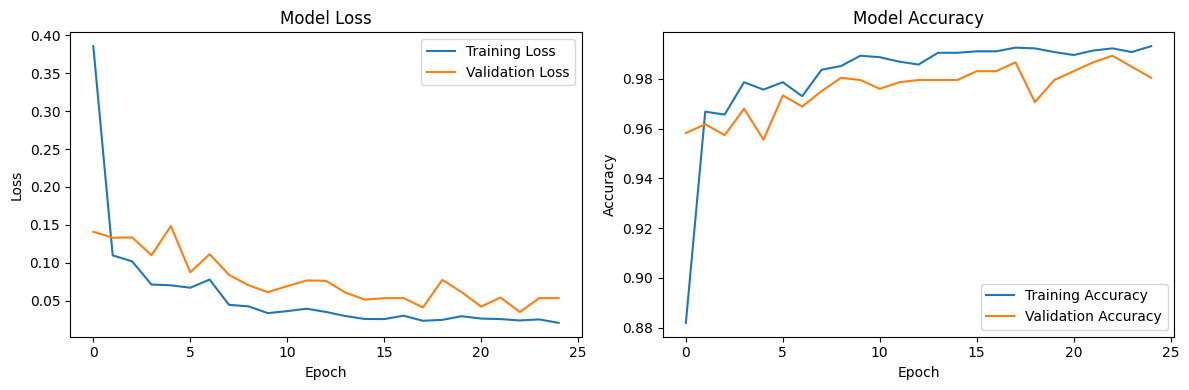

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the learning curve
plot_learning_curve(history)


In [ ]:
#Create data generator for the test set
batch_size = 32
target_size = (224, 224)

test_datagen = ImageDataGenerator(
    rescale=1.0/255
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)


Found 1127 images belonging to 4 classes.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test set
test_predictions = model_mobilenet.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels from the test set generator
true_labels = test_generator.classes

# Generate a confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Generate a classification report
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion_mtx)
print("\nClassification Report:")
print(class_report)


36/36 [==============================] - 512s 15s/step
Confusion Matrix:
[[298   2   0   0]
 [  0 227   0   0]
 [  1   0 299   0]
 [  4   0   7 289]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       300
           1       0.99      1.00      1.00       227
           2       0.98      1.00      0.99       300
           3       1.00      0.96      0.98       300

    accuracy                           0.99      1127
   macro avg       0.99      0.99      0.99      1127
weighted avg       0.99      0.99      0.99      1127



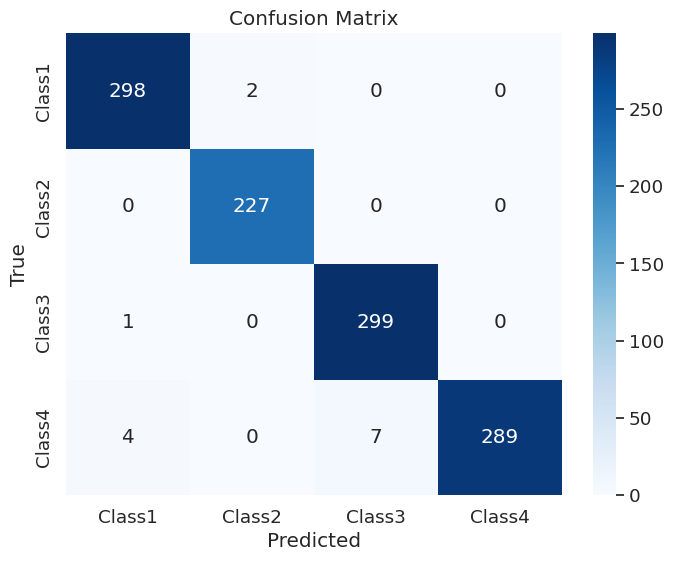

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming you have class labels)
class_labels = ['Class1', 'Class2', 'Class3', 'Class4']  # Replace with your class labels

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#################################################################################

In [ ]:
# Custom cnn model

In [ ]:
# Create data generator
batch_size = 32
target_size = (224, 224)
datagen = ImageDataGenerator(
    rescale=1.0/255
)

# Specify the paths to the training and validation directories
train_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split/train'
val_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split/val'


train_ds = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse'  # Use 'sparse' for non-one-hot encoded labels
)

val_ds = datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for non-one-hot encoded labels
    shuffle=False
)

Found 3378 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a convolutional layer with 8 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())

# Add a fully connected layer with 32 units and 'relu' activation
model.add(Dense(32, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with 4 units (for 4 classes) and 'softmax' activation
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 8)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 98568)             0         
                                                                 
 dense (Dense)               (None, 32)                3154208   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                        

In [ ]:
# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/custom_cnn0_best.h5', monitor='accuracy', verbose=1, mode='max', save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", restore_best_weights=True, patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.3, patience=3, min_lr=0.0000001)
callbacks_list = [checkpoint, early, reduce_lr]

# Model Training
history_custom_cnn0 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    shuffle=True,
    verbose=True,
    callbacks=callbacks_list
)

Epoch 1/25
106/106 [==============================] - ETA: 0s - loss: 1.1309 - accuracy: 0.5471 
Epoch 1: accuracy improved from -inf to 0.54707, saving model to model/custom_cnn0_best.h5
106/106 [==============================] - 2870s 27s/step - loss: 1.1309 - accuracy: 0.5471 - val_loss: 0.6973 - val_accuracy: 0.7558 - lr: 0.0010
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


106/106 [==============================] - ETA: 0s - loss: 0.8298 - accuracy: 0.6255
Epoch 2: accuracy improved from 0.54707 to 0.62552, saving model to model/custom_cnn0_best.h5
106/106 [==============================] - 13s 127ms/step - loss: 0.8298 - accuracy: 0.6255 - val_loss: 0.5770 - val_accuracy: 0.8224 - lr: 0.0010
Epoch 3/25
106/106 [==============================] - ETA: 0s - loss: 0.7792 - accuracy: 0.6240
Epoch 3: accuracy did not improve from 0.62552
106/106 [==============================] - 14s 128ms/step - loss: 0.7792 - accuracy: 0.6240 - val_loss: 0.5480 - val_accuracy: 0.8162 - lr: 0.0010
Epoch 4/25
106/106 [==============================] - ETA: 0s - loss: 0.7533 - accuracy: 0.6359
Epoch 4: accuracy improved from 0.62552 to 0.63588, saving model to model/custom_cnn0_best.h5
106/106 [==============================] - 14s 129ms/step - loss: 0.7533 - accuracy: 0.6359 - val_loss: 0.5044 - val_accuracy: 0.8419 - lr: 0.0010
Epoch 5/25
106/106 [===========================

In [ ]:
import pandas as pd

# Custom_CNN EVALUATION
train_result_custom = model.evaluate(train_ds)
val_result_custom = model.evaluate(val_ds)

custom_cnn_df = pd.DataFrame(zip(train_result_custom, val_result_custom), columns=['Train', 'Val'], index=['Loss', 'Acc'])
custom_cnn_df

36/36 [==============================] - 4s 98ms/step - loss: 0.3936 - accuracy: 0.8748


,Train,Val
Loss,0.384936,0.393565
Acc,0.869449,0.874778


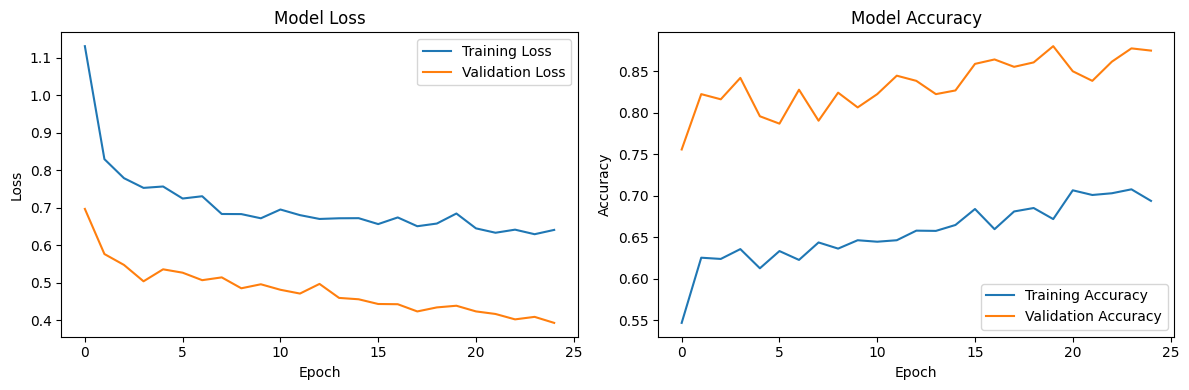

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history_custom_cnn):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history_custom_cnn.history['loss'], label='Training Loss')
    plt.plot(history_custom_cnn.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history_custom_cnn.history['accuracy'], label='Training Accuracy')
    plt.plot(history_custom_cnn.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the learning curve
plot_learning_curve(history_custom_cnn0)

In [ ]:
#Create data generator
batch_size = 32
target_size = (224, 224)

test_datagen = ImageDataGenerator(
    rescale=1.0/255
)


# Create a data generator for the test set with the specified target size
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 1127 images belonging to 4 classes.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test set
test_predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels from the test set generator
true_labels = test_generator.classes

# Generate a confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Generate a classification report
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion_mtx)
print("\nClassification Report:")
print(class_report)

36/36 [==============================] - 666s 19s/step
Confusion Matrix:
[[248  46   1   5]
 [  7 220   0   0]
 [  0   0 289  11]
 [  8   0  90 202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       300
           1       0.83      0.97      0.89       227
           2       0.76      0.96      0.85       300
           3       0.93      0.67      0.78       300

    accuracy                           0.85      1127
   macro avg       0.86      0.86      0.85      1127
weighted avg       0.87      0.85      0.85      1127



In [ ]:
# Custom cnn model with augmentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add a convolutional layer with 8 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# Add a max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
model.add(Flatten())

# Add a fully connected layer with 32 units and 'relu' activation
model.add(Dense(32, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with 4 units (for 4 classes) and 'softmax' activation
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 8)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 98568)             0         
                                                                 
 dense (Dense)               (None, 32)                3154208   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                        

In [ ]:
# Callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint('model/custom_cnn_best.h5', monitor='accuracy', verbose=1, mode='max', save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", restore_best_weights=True, patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.3, patience=3, min_lr=0.0000001)
callbacks_list = [checkpoint, early, reduce_lr]

# Model Training
history_custom_cnn = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    shuffle=True,
    verbose=True,
    callbacks=callbacks_list
)

Epoch 1/25
106/106 [==============================] - ETA: 0s - loss: 1.3465 - accuracy: 0.4624 
Epoch 1: accuracy improved from -inf to 0.46240, saving model to model/custom_cnn_best.h5
106/106 [==============================] - 1756s 17s/step - loss: 1.3465 - accuracy: 0.4624 - val_loss: 0.6743 - val_accuracy: 0.6803 - lr: 0.0010
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


106/106 [==============================] - ETA: 0s - loss: 0.8718 - accuracy: 0.5625
Epoch 2: accuracy improved from 0.46240 to 0.56246, saving model to model/custom_cnn_best.h5
106/106 [==============================] - 76s 721ms/step - loss: 0.8718 - accuracy: 0.5625 - val_loss: 0.5839 - val_accuracy: 0.7940 - lr: 0.0010
Epoch 3/25
106/106 [==============================] - ETA: 0s - loss: 0.8501 - accuracy: 0.5841
Epoch 3: accuracy improved from 0.56246 to 0.58407, saving model to model/custom_cnn_best.h5
106/106 [==============================] - 74s 700ms/step - loss: 0.8501 - accuracy: 0.5841 - val_loss: 0.5531 - val_accuracy: 0.8570 - lr: 0.0010
Epoch 4/25
106/106 [==============================] - ETA: 0s - loss: 0.8294 - accuracy: 0.5829
Epoch 4: accuracy did not improve from 0.58407
106/106 [==============================] - 75s 705ms/step - loss: 0.8294 - accuracy: 0.5829 - val_loss: 0.5771 - val_accuracy: 0.7744 - lr: 0.0010
Epoch 5/25
106/106 [=============================

In [ ]:
import pandas as pd

# Custom_CNN EVALUATION
train_result_custom = model.evaluate(train_ds)
val_result_custom = model.evaluate(val_ds)

custom_cnn_df = pd.DataFrame(zip(train_result_custom, val_result_custom), columns=['Train', 'Val'], index=['Loss', 'Acc'])
custom_cnn_df


36/36 [==============================] - 20s 553ms/step - loss: 0.4899 - accuracy: 0.8055


,Train,Val
Loss,0.477244,0.489929
Acc,0.810243,0.805506


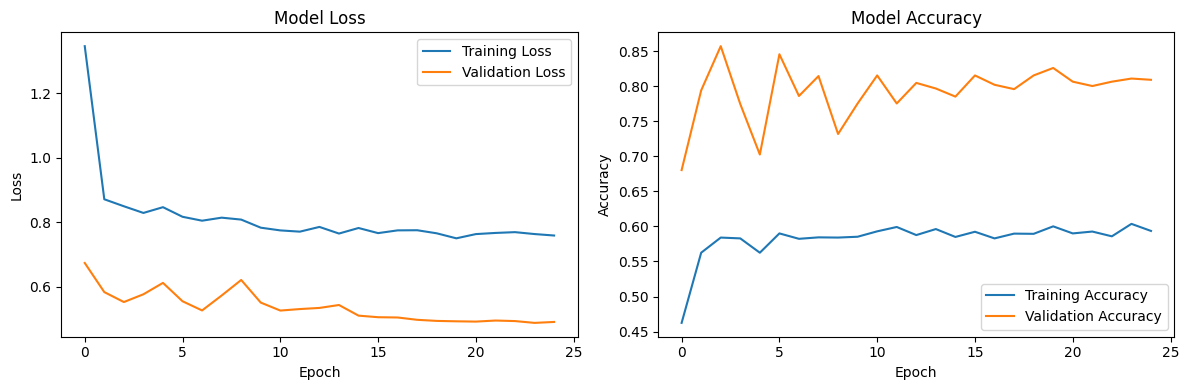

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history_custom_cnn):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history_custom_cnn.history['loss'], label='Training Loss')
    plt.plot(history_custom_cnn.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history_custom_cnn.history['accuracy'], label='Training Accuracy')
    plt.plot(history_custom_cnn.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the learning curve
plot_learning_curve(history_custom_cnn)

In [ ]:
########################################################################

In [ ]:
# Cnn_Model

In [ ]:
# Create data generator
batch_size = 64
target_size = (256, 256)
datagen = ImageDataGenerator(
    rescale=1.0/255
)

# Specify the paths to the training and validation directories
train_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split/train'
val_dir = '/content/gdrive/MyDrive/ERGASIA DL/Satellite Images/split/val'


train_ds = datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse'  # Use 'sparse' for non-one-hot encoded labels
)

val_ds = datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',  # Use 'sparse' for non-one-hot encoded labels
    shuffle=False
)

Found 3378 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers.experimental import preprocessing

rescale = preprocessing.Rescaling(1.0 / 255)
augment = tf.keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.1),
    preprocessing.RandomZoom(0.1),
    preprocessing.RandomHeight(0.1),
    preprocessing.RandomWidth(0.1),
])


In [ ]:
input_shape=(256, 256 ,3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape
input_shape = (256, 256, 3)

# Create a Sequential model
model = tf.keras.Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Add a max-pooling layer
model.add(MaxPooling2D((2, 2)))

# Add a Flatten layer
model.add(Flatten())

# Add a fully connected layer with 32 units and 'relu' activation
model.add(Dense(32, activation='relu'))

# Add a dropout layer for regularization
model.add(Dropout(0.5))

# Add the output layer with 4 units (for 4 classes) and 'softmax' activation
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 516128)            0         
                                                                 
 dense_16 (Dense)            (None, 32)                16516128  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 4)                 132       
                                                      

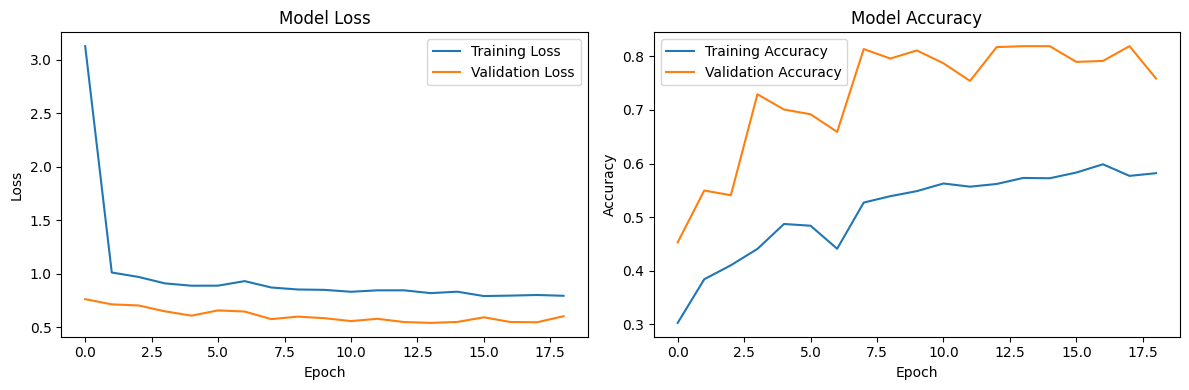

In [26]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    # Plot training & validation loss values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function to plot the learning curve
plot_learning_curve(history)

In [29]:
#Create data generator for the test set
batch_size = 64
target_size = (256, 256)

test_datagen = ImageDataGenerator(
    rescale=1.0/255
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 1127 images belonging to 4 classes.


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions on the test set
test_predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels from the test set generator
true_labels = test_generator.classes

# Generate a confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Generate a classification report
class_report = classification_report(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion_mtx)
print("\nClassification Report:")
print(class_report)

18/18 [==============================] - 531s 31s/step
Confusion Matrix:
[[266  31   3   0]
 [ 13 214   0   0]
 [  0   0 295   5]
 [ 13   0 151 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       300
           1       0.87      0.94      0.91       227
           2       0.66      0.98      0.79       300
           3       0.96      0.45      0.62       300

    accuracy                           0.81      1127
   macro avg       0.85      0.82      0.80      1127
weighted avg       0.85      0.81      0.80      1127



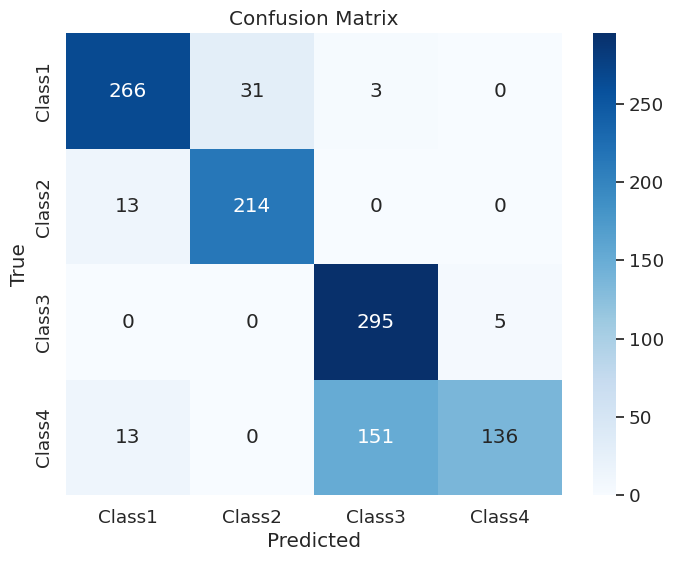

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Define class labels (assuming you have class labels)
class_labels = ['Class1', 'Class2', 'Class3', 'Class4']  # Replace with your class labels

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size if needed
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()